# Yapay verilerin üzerinde Linear regresyon

In [93]:

#Gerekli olan kütüphanelerin tanımlanması
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

Genel yapı olarak (ileride de kulllanılacak ) model oluşturmak ve eğitme fonksiyonları

In [94]:
#model oluşturmak için fonkisyon tanımlanıypr 
def build_model(my_learning_rate):
  # sequential modellemesi kullanılıyor basit yönlü olduğu için . 
  #https://www.datasciencearth.com/keras-model-wars-sequential-vs-functional/ detaylı anlatıma burdaan ulaşabilirsiniz
  model = tf.keras.models.Sequential()


  # tek katman  tek nöronlu bir yapı kullanılıyor ve giriş boyutu belirlenmesi
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Model derleniyor optimizer olarak Kök kare ortolaması tercih ediliyor (Adams daha başarılı) ve loss değerini 
  # ortalamanın, gerçek değer ile farkınıni karesi toplamı  şeklinde buluyor(wikipedia'dan araştırmanızı tavsiye ederim)

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           

# Modeli eğitmek için fonksiyon tanımlaması 
def train_model(model, feature, label, epochs, batch_size):


  # Belirlediğimiz modele  verilen genişlik, tekrar sayısı ve veriler ile uyum sağlatıyoruz
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Başlangın nokta ağırlığı bias' ı belirlenmesi.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]


  epochs = history.epoch
  
  # Her tekrarda ayrı ayrı data frame'inin alınması ve gönderilmesi
  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse



In [95]:
# Modelin grafiğini olduşturma fonksiyonu (Seaborn daha detaylı ve anlaşılır grafik oluşturur)
def plot_the_model(trained_weight, trained_bias, feature, label):
  # eksen tanımı 
  plt.xlabel("feature")
  plt.ylabel("label")

  # Etiketler.
  plt.scatter(feature, label)

  # daha iyi anlamak için kırmızı çizgi ile lineer çizgiyi göstermer
  x0 = 0
  y0 = trained_bias
  x1 = my_feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Ekrana gösterme işlmei
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  #Loss değerlerin epoch a göre değişimi (ÇOK ÖNEMLİ BİR GRAFİK BURADAN MODELİMİZ HAKKINDA YORUM YAPACAĞIZ)

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()



In [96]:
# Basit bir veri tanımı my_feature, sonuca etki eden  özelliklerimizi; my_label, sonuçlarımızı temsil eder
my_feature = np.array([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = np.array([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 0s 188ms/step - loss: 836.4932 - root_mean_squared_error: 28.9222
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 821.4702 - root_mean_squared_error: 28.6613
Epoch 3/10
1/1 [==============================] - 0s 1ms/step - loss: 810.7033 - root_mean_squared_error: 28.4729
Epoch 4/10
1/1 [==============================] - 0s 2ms/step - loss: 801.7658 - root_mean_squared_error: 28.3155
Epoch 5/10
1/1 [==============================] - 0s 999us/step - loss: 793.8889 - root_mean_squared_error: 28.1760
Epoch 6/10
1/1 [==============================] - 0s 998us/step - loss: 786.7163 - root_mean_squared_error: 28.0485
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 780.0494 - root_mean_squared_error: 27.9294
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 773.7651 - root_mean_squared_error: 27.8166
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 767.7808 - r

c:\python\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


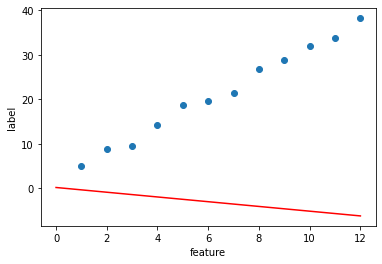

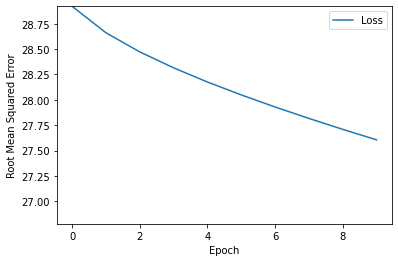

In [97]:
#Yukarıdan tanımlanan fonksiyon ve veriler kullanarak modelimizi oluşturacağız
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Grafiği İncelemek


Kırmızı çizgi ve RMSE incelendiğinde aslında başarısız bir modelimizin olduğunu anlarız.
Düzeltmek için
+ Tekrar sayısı arttıralabilir, ancak dikkat edilmelidir ki ezberleme durumuna girmemelidir.
+ Dikkat edilmesi gereken diğer nokta her tekrarda 12 veriyi aynı anda işlemektedir, bu istenmeyen bir durumdur parçalı olarak işlemek daha doğru bir yaklaşım olacaktır.
+ Modele nöron eklebilir ki, bu kısıtlı veri için mümkün olası durmamakta.
+ Kullanılan özellik ağırlığı değiştirilebilir, fakat başka özelliğimiz olmadığından bu seçenk de dışarıda kalmakta


Epoch 1/100
1/1 [==============================] - 0s 180ms/step - loss: 1180.8684 - root_mean_squared_error: 34.3638
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 1163.0059 - root_mean_squared_error: 34.1029
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 1150.1788 - root_mean_squared_error: 33.9143
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 1139.5167 - root_mean_squared_error: 33.7567
Epoch 5/100
1/1 [==============================] - 0s 998us/step - loss: 1130.1088 - root_mean_squared_error: 33.6171
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 1121.5332 - root_mean_squared_error: 33.4893
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 1113.5549 - root_mean_squared_error: 33.3700
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 1106.0278 - root_mean_squared_error: 33.2570
Epoch 9/100
1/1 [==============================] - 0s 2ms/step - los

1/1 [==============================] - 0s 2ms/step - loss: 781.5889 - root_mean_squared_error: 27.9569
Epoch 72/100
1/1 [==============================] - 0s 2ms/step - loss: 777.1008 - root_mean_squared_error: 27.8765
Epoch 73/100
1/1 [==============================] - 0s 999us/step - loss: 772.6260 - root_mean_squared_error: 27.7962
Epoch 74/100
1/1 [==============================] - 0s 1ms/step - loss: 768.1647 - root_mean_squared_error: 27.7158
Epoch 75/100
1/1 [==============================] - 0s 2ms/step - loss: 763.7168 - root_mean_squared_error: 27.6354
Epoch 76/100
1/1 [==============================] - 0s 2ms/step - loss: 759.2824 - root_mean_squared_error: 27.5551
Epoch 77/100
1/1 [==============================] - 0s 2ms/step - loss: 754.8611 - root_mean_squared_error: 27.4747
Epoch 78/100
1/1 [==============================] - 0s 1ms/step - loss: 750.4534 - root_mean_squared_error: 27.3944
Epoch 79/100
1/1 [==============================] - 0s 2ms/step - loss: 746.0590 - 

c:\python\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


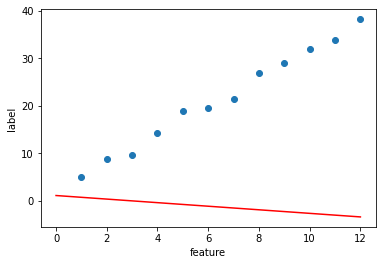

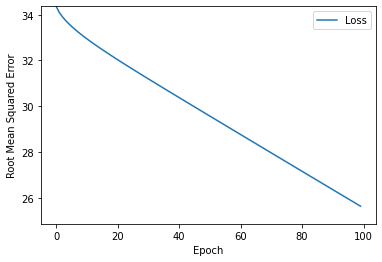

In [98]:
#epoch sayısı arrttılmış model
learning_rate=0.01
epochs=100
my_batch_size=12

my_model1 = build_model(learning_rate)
trained_weight1, trained_bias1, epochs, rmse = train_model(my_model1, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight1, trained_bias1, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch sayısı arttırmak biraz işe yaradı ama tam istediğimiz gibi değil , Batch size ı 1 yapıp parçalı olarak veri setini aynı anda okumasını deneyelim

Epoch 1/50
12/12 [==============================] - 0s 2ms/step - loss: 291.5051 - root_mean_squared_error: 17.0735
Epoch 2/50
12/12 [==============================] - 0s 637us/step - loss: 259.8939 - root_mean_squared_error: 16.1212
Epoch 3/50
12/12 [==============================] - 0s 546us/step - loss: 234.7477 - root_mean_squared_error: 15.3215
Epoch 4/50
12/12 [==============================] - 0s 546us/step - loss: 212.5807 - root_mean_squared_error: 14.5801
Epoch 5/50
12/12 [==============================] - 0s 546us/step - loss: 191.4922 - root_mean_squared_error: 13.8381
Epoch 6/50
12/12 [==============================] - 0s 545us/step - loss: 171.4557 - root_mean_squared_error: 13.0941
Epoch 7/50
12/12 [==============================] - 0s 546us/step - loss: 154.0045 - root_mean_squared_error: 12.4099
Epoch 8/50
12/12 [==============================] - 0s 546us/step - loss: 136.9221 - root_mean_squared_error: 11.7014
Epoch 9/50
12/12 [==============================] - 0s 546

c:\python\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


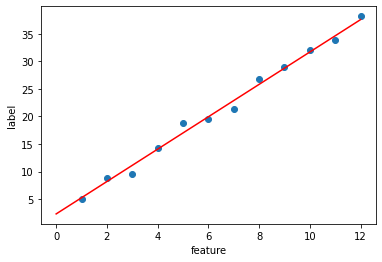

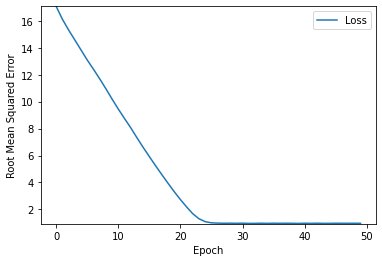

In [99]:
#epoch sayısı arrttılmış model
learning_rate=0.01
epochs=50
my_batch_size=1

my_model2 = build_model(learning_rate)
trained_weight2, trained_bias2, epochs, rmse = train_model(my_model2, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight2, trained_bias2, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

In [100]:
#Tahmin yapalım
my_model2.predict([6.2])

array([[20.532404]], dtype=float32)

In [101]:
# x=6 değeri label da 5. index e denk gelmekte
my_label[5]

19.5

Makul bir değer olduğunu görmekteyiz modelimiz doğru çalışmakta